# TP 7: Éléments finis en 2D

Dans ce TP, on s'intéresse à la résolution approchée du problème aux limites suivant, avec conditions aux limites de Neumann homogène :

$$
(PN)\left\{\begin{aligned}
&-\Delta u+u=f,\ \textrm{dans }\Omega,\\
&\frac{\partial u}{\partial n}=0, \textrm{dans }\partial\Omega
\end{aligned}
\right.
$$
où $f:\overline{\Omega}\longrightarrow\mathbb{R}$ est une fonction de classe $\mathcal{C}^2$ donnée et où $\Omega$ est un ouvert de $\mathbb{R}^2$ donné. 

**Q1)** Écrire la formulation variationnelle du problème $(P)$ sous la forme 
\begin{equation*}
(PNv)\ \ \ 
\begin{cases}
u\in V  \,\textrm{tel que}\\
a(v,u)=L(v),\ \,\forall\ v\in V ,
\end{cases}
\end{equation*}
où $V=H^1(\Omega)$, $a$ est une forme bilinéaire dans $V$  et $L$ une forme linéaire de $V,$ que l'on explicitera. Montrer que le problème $(PNv)$ admet une unique solution.

Soit $T_h$ une triangulation du domaine $\Omega$ et $V_h$ l'approximation de $H^1(\Omega)$ par des éléments finis $P^1$ associés à la triangulation $T_h.$ On note $\{T_N\}_{N=1,\dots,Ntri}\ $ les triangles de $T_h,$ $\{S_I\}_{I=1,\dots,NSom}\ $ les sommets de la triangulation et $\{\Phi_I\}_{I=1,\dots,NSom}\ $ les fonctions de la base de $V_h$ définies par $\Phi_I(S_J)=\delta_{IJ},\ I,J=1,\dots,NSom.$ 

Le problème discret consiste alors à chercher $u_h\in V_h$ tel que 
$$
(PNv_h)\ \ \ \ \ \ \ \ \ a(\Phi_I,u_h)=L(\Phi_I),\ \,\forall\ I=1,\dots,NSom. 
$$

**Q2)** Soit $u_h=\displaystyle{\sum_{I=1}^{{NSom}}u_I\Phi_I}.$ Montrer que $u_h$ est solution de $(PNv_h)$ si et seulement si le vecteur $U=(u_1,\dots,u_{NSom})^T$ est solution d'un système linéaire 
$$
KU+MU=F,
$$
où $K$ et $M$ sont les matrices de $\mathcal{M}^{NSom\times NSom}(\mathbb{R})$ définies par $K_{I,J}=\int_{\Omega}\nabla\Phi_I\cdot\nabla\Phi_J,$ $M_{I,J}=\int_{\Omega}\Phi_I\Phi_J,$ et où $F$ est le vecteur de $\mathbb{R}^{NSom}$ défini par $F_I=\int_{\Omega}f\Phi_I.$ 

** Maillage de $\Omega.$ **

Dans un premier temps on considère $\Omega$ le carré $[0,2]\times[0,2].$ 

La triangulation $T_h$ de $\Omega$ est représentée par deux matrices. La première, que l'on appellera dans le programme python $TabTri,$ contient la liste des triangles. Il s'agit d'une matrice de taille $NTri\times3$ que, dans chaque ligne $N$, contient l'indice $I$ de chaque sommet $S_I$ appartenant au triangle $T_N.$ La deuxième, que l'on appellera $TabSom,$ contient les coordonnées de chaque sommet de la triangulation. C'est une matrice de taille $NSom\times2$ que, dans chaque ligne $I$ contient les coordonnées du sommet $S_I.$ 
Le code suivant crée le maillage et ces matrices.


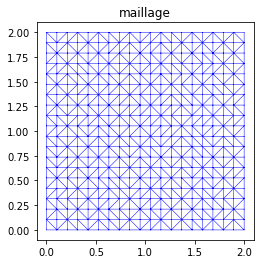

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.tri as tri
import math
import numpy.random as rd


Nx=18
Ny=18

x_m=0
x_M=2
y_m=0
y_M=2

x=np.linspace(x_m,x_M,Nx+2)
y=np.linspace(y_m,y_M,Ny+2)

X,Y=np.meshgrid(x,y)

X=X.flatten()
Y=Y.flatten()

triang = tri.Triangulation(X, Y)

NTri=np.shape(triang.triangles)[0]
NSom=np.shape(triang.x)[0]

#Tableau avec coordonnes des noeuds
TabSom=np.zeros([NSom,2])
TabSom[:,0]=triang.x
TabSom[:,1]=triang.y

# Tableau avec noeuds des triangles
TabTri=triang.triangles

plt.figure(1)
plt.gca().set_aspect('equal')
plt.triplot(X,Y,triang.triangles, 'b-', lw=0.5)
plt.title('maillage')

plt.show()



** Les matrices élémentaires **

Pour construire les matrices de masse M et de rigidité K, on commence par définir des matrices élémentaires qui permettent, localement sur un triangle $T_N$ de noeuds $S_{I_1},\ S_{I_2}$ et $S_{I_3},$ de calculer 
$$
\int_{T_N}\nabla\Phi_{I_i}\dot\nabla\Phi_{I_j}\ \ \ \textrm{et}\ \ \ \ \int_{T_N}\Phi_{I_i}\dot\Phi_{I_j} 
$$
pour $i,\ j=1,2,3.$ Ces intégrales vont contribuer respectivement à l'élément $K_{I_i,I_j}$ et $M_{I_i,I_j}$ des matrices globales.

** Q3)** Construire deux fonctions $M_{elem}(\mathcal{S1},\mathcal{S2},\mathcal{S3})$ et $K_{elem}(\mathcal{S1},\mathcal{S2},\mathcal{S3})$ calculant les matrices de masse et de rigidité élémentaires sur un triangle $T$ de sommets $\mathcal{S1}=(x_1,y_1),\ \mathcal{S2}=(x_2,y_2)$ et $\mathcal{S3}=(x_3,y_3).$  
Pour calculer la matrice de masse élémentaire sur le triangle $T,$ on peut utiliser les formules ci-dessous, que l'on vérifiera. 
Les fonctions de base associées à chaque sommet de $T$ sont localement données par
$$
\lambda_1(x,y)=\frac{1}{D}(y_{23}(x-x_3)-x_{23}(y-y_3)),\ \ \ \lambda_2(x,y)=\frac{1}{D}(y_{31}(x-x_1)-x_{31}(y-y_1)),\ \ \ \lambda_3(x,y)=\frac{1}{D}(y_{12}(x-x_2)-x_{12}(y-y_2)),
$$
où $x_{ij}=x_i-x_j,\ y_{ij}=y_i-y_j$ et $D=x_{23}y_{31}-x_{31}y_{23}.$ $|D|$ est égal à deux fois la surface du triangle.

Pour $k_1,\ k_2,\ k_3\in\{0,1,2\},$ on a 
$$
\int_{T}\lambda_1^{k_1}\lambda_2^{k_2}\lambda_3^{k_3}=2\frac{k_1!k_2!k_3!}{(k_1+k_2+k_3+2)!}aire(T).
$$


In [2]:
# a compléter
#def M_elem(S1,S2,S3):
    #...
    
#def K_elem(S1,S2,S3):
    #...

# A LA FIN : vérifier le calcul des matrices élémentaires sur le triangle de référence de noeuds (0,0), (0,1) et (1,0). 

** Assemblage des matrices $M$ et $K.$ **

Dans cette partie on met en oeuvre un algorithme pour construire les matrices $M$ et $K.$ Pour ce faire on remarque que, par exemple, 
$$
M_{I,J}=\sum_{N=1}^{NTri}\int_{T_N}\Phi_I\Phi_J=\sum_{N : S_I,S_J\in T_N}\int_{T_N}\Phi_I\Phi_J.
$$

L'algoritme de construction des matrices consiste alors à faire la boucle suivante :

    Pour N= 1...NTri
         Détérmination des sommets S_I1, S_I2 et S_I3 du triangle T_N
         Calcul des matrices élémentaires associées au triangle T_N
             Pour i=1..3
                Pour j=1...3 
                    M(Ii,Ij)=M(Ii,Ij)+M_elem(i,j)

**Q4)** Compléter dans le programme l'assemblage des matrices M et K

In [ ]:
K = np.zeros([NSom,NSom])
M = np.zeros([NSom,NSom])
# A compléter

**Calcul du second membre $F.$**

On peut calculer exactement les composantes $F_I$ du vecteur $F$ ou approcher ses valeurs en utilisant par exemple des formules de quadrature.

Ici on fait le choix de remplacer $f$ par son interpolé $P^1$ aux points du maillage, *i.e.* on approche $f$ par la fonction $\displaystyle{\sum_{I=1}^{NSom}f(S_I)\Phi_I}.$ 

**Q5)** En approchant $f$ par son interpolé, donner une approximation du second membre $F$ faisant intervenir la matrice de masse.  

On admet que cette approximation ne change pas l'approximation par éléments finis du problème. 

**Validation : calcul d'une solution connue**

On considère $f$ tel que la fonction
$$
u(x,y)=\cos(\pi x)\cos(2\pi y)
$$
est solution du problème (PN) dans $\Omega=[0,2]\times[0,2].$ 

**Q6)** Construire dans le programme une fonction $f(x,y)$ définissant le second membre $f$ et calculer l'approximation du vecteur $F$ obtenue comme expliqué dessus. Calculer le vecteur $U$ des coefficients de la solution approchée donnée par la méthode des élements finis et utiliser le code suivant pour la visualiser.

In [3]:
#plt.figure(2)
#plt.gca().set_aspect('equal')
#  #plt.tripcolor(triang, U, shading='flat')
#plt.tripcolor(triang.x,triang.y,triang.triangles, U, shading='flat')
#plt.colorbar()
#plt.title('solution approchée par EF P1')

#plt.show()

**Q7)** Soit $\Pi_h u=\displaystyle{\sum_I=1^{NSom} u(S_I)\Psi_i}$ l'interpolé $P1$ de la solution exacte $u$ de $(PN)$ aux points $S_I.$ Calculer, pour différentes valeurs de $h,$ la norme $L^2$ de l'erreur $u_h-\Pi_h u.$ Remarquer que cette intégrale peut se calculer en utilisant la matrice de masse $M.$ Evaluer l'ordre de précision de la méthode en norme $L^2.$ 

**Q8) Une autre structure de maillage** 
Remplacez le debut de votre programme par le code ci-dessus, pour générer un maillage non structuré du carré.

In [ ]:
Nx=18
Ny=18

x_m=0.
x_M=2.
y_m=0.
y_M=2.

Rx=rd.random([Nx+2,Nx+2])
Rx[:,0]=0
Rx[:,-1]=0
Ry=rd.random([Ny+2,Ny+2])
Ry[0,:]=0
Ry[-1,:]=0
x=np.linspace(x_m,x_M,Nx+2)#+4*((x_M-x_m)/(5*(Nx+2)))*Rx
y=np.linspace(y_m,y_M,Ny+2)#+4*((y_M-y_m)/(5*(Ny+2)))*Ry

X,Y=np.meshgrid(x,y)
X=X+0.9*((x_M-x_m)/((Nx+2)))*Rx
Y=Y+0.9*((y_M-y_m)/((Ny+2)))*Ry
print X
print Y

X=X.flatten()
Y=Y.flatten()

triang = tri.Triangulation(X, Y)

**Q9) Domaine coronne** On considère le problème (PN) dans une coronne. Pour cela remplacer le debut de votre code par le code ci-dessous, qui crée le domaine de calcul et le maillage. 


In [ ]:
def triangulation_couronne(nrad=8,nang=36):
    radii = np.linspace(0.25, 1, nrad)
    angles = np.linspace(0, 2*np.pi, nang, endpoint=False)
    angles = np.repeat(angles[..., np.newaxis], nrad, axis=1)
    angles[:, 1::2] += np.pi/nang
    x = (radii*np.cos(angles)).flatten()
    y = (radii*np.sin(angles)).flatten()

    # On construit une triangulation de Delaunay et on filtre les triangles proches de l'origine
    triang = tri.Triangulation(x, y)
    xmid = x[triang.triangles].mean(axis=1)
    ymid = y[triang.triangles].mean(axis=1)
    mask = xmid*xmid + ymid*ymid >= .25*.25
    T = triang.triangles[mask,:]
    return x,y,T

[x,y,T] = triangulation_couronne(8,36)


NTri=np.shape(T)[0]
NSom=np.shape(x)[0]

TabSom=np.zeros([NSom,2])
TabSom[:,0]=x
TabSom[:,1]=y

# noeuds des triangles
TabTri=T

# .... Le programme

